In [1]:
pre_folder  = "/Users/Gonzalo/github/CCdata/Californication/pre/Californication_pre_2019_05_10_18_34_21_248000/"

In [2]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from CCfun import load_ccd_file
from CCfun import select_crystal_filenames
from CCfun import load_as_df
from CCfun import read_experiment_metadata

from CCplot import plot1d
from CCplot import plot2d
from CCplot import temporary
from CCplot import auto_plot_style

In [14]:
%matplotlib inline

style = {
    "font.size" : 20
}
auto_plot_style(style)

In [4]:
pre  = dict()

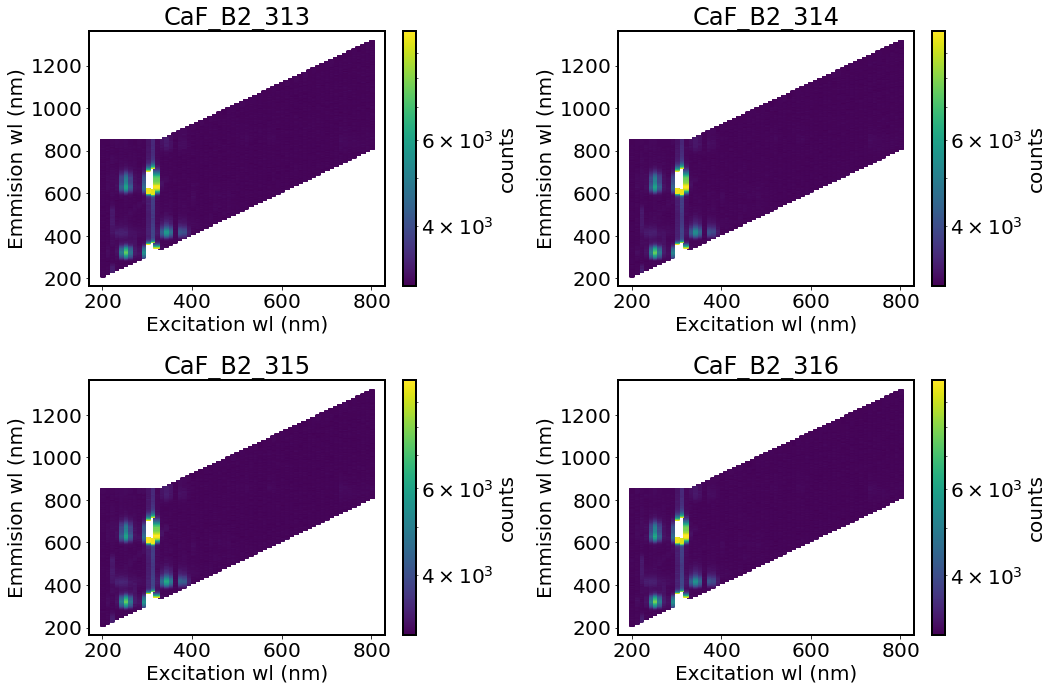

In [17]:
plt.figure(figsize=(15, 10))

k    = 1
meta = read_experiment_metadata(pre_folder)

for crystal, crystal_id in meta["crystal_mapping"].items():
    if int(crystal) < 8: continue
    if crystal_id not in pre:
        filenames       = select_crystal_filenames(pre_folder, crystal)
        pre[crystal_id] = load_as_df(filenames)

    dataframe = pre[crystal_id]
    dataframe = dataframe[dataframe.exp_index  ==     0]
    dataframe = dataframe[dataframe.exposure   ==   0.1]
    dataframe = dataframe[dataframe.grating    ==     2]
    dataframe = dataframe[dataframe.slit_width ==  1000]
    dataframe = dataframe[dataframe.looparound == False]

    plt.subplot(2, 2, k)
    plot2d(dataframe.ex_wl .values,
           dataframe.em_wl .values,
           dataframe.counts.values,
           title=crystal_id, log=True, cmin=3e3, cmax=1e4)
    k += 1
plt.tight_layout()